### Installation and Importing Libraries

In [2]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import gzip
import json
import csv
import pickle
import re
from unidecode import unidecode
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
import unicodedata
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np

In [4]:
# Download necessary NLTK resources
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
nltk.download('punkt')
nltk.download('wordnet')

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

True

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

### Collecting data from the JSON file

In [6]:
def parse(path):
    with open(path, 'r') as f:
        for line in f:
            yield json.loads(line)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
# reviews_data = getDF("/kaggle/input/assignment3/Electronics_5.json/Electronics_5.json")

In [6]:
# reviews_data.head()

In [7]:
# with open('reviews_data.pkl', 'wb') as f:
#     pickle.dump(reviews_data, f)

In [6]:
with open('/kaggle/input/reviews/reviews_data.pkl', 'rb') as f:
    df = pickle.load(f)

In [6]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


In [10]:
# metadata = getDF("/kaggle/input/assignment3/meta_Electronics.json/meta_Electronics.json")

In [11]:
# metadata.head()

In [12]:
# with open('metadata.pkl', 'wb') as f:
#     pickle.dump(metadata, f)

In [7]:
with open('/kaggle/input/metadata/metadata.pkl', 'rb') as f:
    metadata_df = pickle.load(f)

In [8]:
metadata_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Camera &amp; Photo, Video Survei...",,[The following camera brands and models have b...,,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],,GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...","[>#3,092 in Tools &amp; Home Improvement &gt; ...",[],Camera &amp; Photo,,"January 28, 2014",$65.00,0011300000,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Electronics, Camera &amp; Photo]",,[This second edition of the Handbook of Astron...,,"Books ""Handbook of Astronomical Image Processi...",[0999470906],,33 Books Co.,[Detailed chapters cover these fundamental top...,"[>#55,933 in Camera &amp; Photo (See Top 100 i...","[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,,"June 17, 2003",,0043396828,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Electronics, eBook Readers &amp; Accessories,...",,[A zesty tale. (Publishers Weekly)<br /><br />...,,One Hot Summer,"[0425167798, 039914157X]",,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,,,$11.49,0060009810,[],[],NaN
3,"[Electronics, eBook Readers & Accessories, eBo...",,[],,Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",,Visit Amazon's Dick Gackenbach Page,[],"2,024,298 in Books (","[0060219521, 0060219475, 0060219394]",Books,,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0060219602,[],[],NaN
4,"[Electronics, eBook Readers & Accessories, eBo...",,[&#8220;sex.lies.murder.fame. is brillllli&#82...,,sex.lies.murder.fame.: A Novel,[],,Visit Amazon's Lolita Files Page,[],"3,778,828 in Books (",[],Books,,,$13.95,0060786817,[],[],NaN


### Data containing Headphones as the product

In [7]:
# Filter rows containing 'headphones' in the title
headphones_data = metadata_df[metadata_df['title'].str.contains('headphone', case=False, na=False)]

In [11]:
headphones_data

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
8,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Wireless Bluetooth Headphones Earbuds with Mic...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,[>#950 in Cell Phones & Accessories (See Top 1...,[],Home Audio & Theater,,"October 23, 2017",$7.99,0132492776,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
47,"[Electronics, Headphones]",,[Use these high quality headphones for interne...,,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,[],,Polaroid,"[Ideal for PC Internet chatting, PC / Console ...","[>#3,548,269 in Cell Phones &amp; Accessories ...",[],All Electronics,,"December 13, 2012",,0558835155,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
132,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#4,626,934 in Cell Phones & Accessories (See...",[],Home Audio & Theater,,"December 28, 2015",,0692206280,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
223,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#2,654,020 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"October 18, 2015",,0983629269,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
229,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#5,289,289 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"April 26, 2013",,0985262788,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786395,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>Specification</b></br> Driver: 5mm</br> ...",,MAXROCK Noise Isolating Sleeping Headphones Ea...,[],,MAXROCK,"[Unique patented silicone design headphones, s...","[>#21,087 in Musical Instruments (See Top 100 ...","[B071WRSL38, B00XCDOGY8, B00V9FN1R4, B00SRAV6V...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",,B01HJAVYDU,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
786400,"[Electronics, Accessories & Supplies, Audio & ...",,"[, <b>Compatible Headphones:</b><br>- SONY MDR...",,Geekria&reg; ELITE Headphone Shoulder Bag / Ca...,[],,Geekria,"[Saffiano Leather, lightweight and fashionable...","[>#4,760 in Electronics > Accessories & Suppli...","[B0796LWMCR, B019Z81V3M, B00TBELD02, B01CJJ2IF...",Home Audio & Theater,"class=""a-bordered a-horizontal-stripes a-spa...",,$1.86,B01HJA2TV6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
786404,"[Electronics, Headphones, Earbud Headphones]",,[About the product Rhapsody & Mogan H9 is a m...,,"Wireless Bluetooth Headset, HandsFree Wireless...",[],,snorain,[COMFORTABLE CUSTOM FIT Rhapsody & Mogan nois...,"[>#343,752 in Cell Phones & Accessories (See T...","[B01D3QZB2Y, B079GFF4HZ, B00XBZY0EI, B00S2P0M1...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",,B01HJAPNHI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
786405,"[Electronics, Headphones,

### Total Rows

In [12]:
# Report the total number of rows for headphones
total_rows = headphones_data.shape[0]
print("Total number of rows for headphones:", total_rows)

Total number of rows for headphones: 27412


In [8]:
# headphones_data.to_csv('headphone_data.csv', index=False, escapechar='\\')
# Read the CSV file back into a DataFrame
headphone_data = pd.read_csv('/kaggle/input/headphone/headphone_data.csv')

### Preprocessing

In [9]:
# Handle missing values 
headphone_data.fillna('Unknown', inplace=True)

# Remove duplicates 
headphone_data.drop_duplicates(inplace=True)

print("Total number of rows after pre-processing for headphones:", headphone_data.shape[0])

Total number of rows after pre-processing for headphones: 26865


### Descriptive Statistics of Headphones

In [9]:
merged_df = pd.merge(df, headphone_data, on='asin', how='inner')
# Number of Reviews
num_reviews = merged_df.shape[0]

In [15]:
# Average Rating Score
avg_rating_score = merged_df['overall'].mean()

# Number of Unique Products
num_unique_products = merged_df['asin'].nunique()

# Number of Good Ratings
num_good_ratings = merged_df[merged_df['overall'] >= 3].shape[0]

# Number of Bad Ratings
num_bad_ratings = merged_df[merged_df['overall'] < 3].shape[0]

# Number of Reviews corresponding to each Rating
rating_counts = merged_df['overall'].value_counts().sort_index()
print("Descriptive Statistics:")
print(f"a. Number of Reviews: {num_reviews}")
print(f"b. Average Rating Score: {avg_rating_score:.2f}")
print(f"c. Number of Unique Products: {num_unique_products}")
print(f"d. Number of Good Ratings: {num_good_ratings}")
print(f"e. Number of Bad Ratings: {num_bad_ratings}")
print("f. Number of Reviews corresponding to each Rating:")
print(rating_counts)

Descriptive Statistics:
a. Number of Reviews: 411201
b. Average Rating Score: 4.11
c. Number of Unique Products: 8064
d. Number of Good Ratings: 353401
e. Number of Bad Ratings: 57800
f. Number of Reviews corresponding to each Rating:
overall
1.0     31009
2.0     26791
3.0     40760
4.0     79153
5.0    233488
Name: count, dtype: int64


### Preprocessing the Text

In [11]:
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the input is a string or bytes-like object
    if isinstance(text, str):
        # Text Normalizer
        text = text.lower()
        
        # Remove HTML tags
        # text = re.sub(r'<[^>]+>', '', text)
        clean = re.compile('<.*?>')
        text = re.sub(clean, '', text)
        
        # Remove accented characters
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        
        # expand contractions in text
        text = contractions.fix(text)
        
        # remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Tokenize text
        tokens = word_tokenize(text)
        
        # Lemmatize tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        # Join tokens back into text
        preprocessed_text = ' '.join(lemmatized_tokens)
        
        return preprocessed_text
    else:
        return text

In [12]:
# Apply preprocessing to text columns in DataFrame
merged_df['reviewText'] = merged_df['reviewText'].apply(preprocess_text)
merged_df['summary'] = merged_df['summary'].apply(preprocess_text)

In [13]:
merged_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,great headphone it is just the cord is too short,five star,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
1,5.0,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,really like these headphone wanted something f...,officewear,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
2,1.0,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,wire to headphone broke off in le than a month...,for the money they are fine just hope they hol...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
3,3.0,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,very good,three star,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
4,1.0,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,currently returning this product because the s...,currently returning this product because the s...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown


In [7]:
# with open('merged_df.pkl', 'wb') as f:
#     pickle.dump(merged_df, f)    
    
with open('/kaggle/input/merged-df/merged_df.pkl', 'rb') as f:
    merged_df = pickle.load(f)

### Relevant Statistics and EDA

Top 20 Most Reviewed Brands:
brand
Sony              28512
Sennheiser        19239
Bose              10027
JVC                7187
Audio-Technica     6670
Etre Jeune         5895
Mpow               5566
Panasonic          5356
iNassen            5354
Philips            5322
Bluedio            5315
EldHus             5055
Koss               4633
MEE audio          4486
Symphonized        4285
XBRN               4245
TaoTronics         4082
V-MODA             4079
Beats              3916
Plantronics        3620
Name: count, dtype: int64

Top 20 Least Reviewed Brands:
brand
Rockford Fosgate           5
ESTAVEL                    5
Iseason                    5
California Cable Market    5
Viotek                     5
ATEX                       5
DESHENG                    5
Unpluggify                 5
LAFEINA                    5
Komingo                    5
Targus                     5
AWMCY                      5
Tt eSPORTS                 5
APG                        5
Oduo            

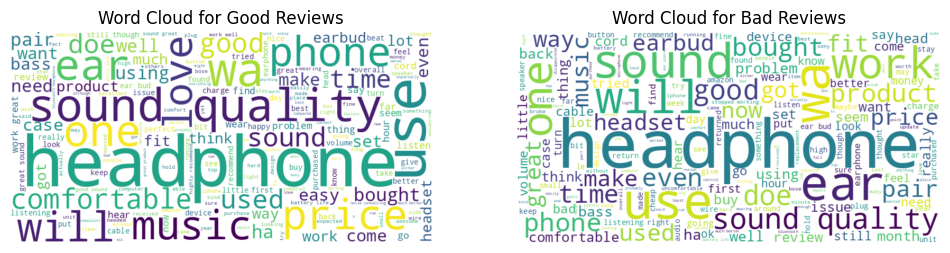

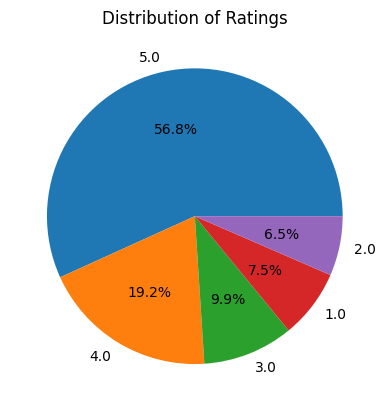


Year with Maximum Reviews: 2016

Year with the Highest Number of Customers: 2016


In [19]:
# Top 20 most reviewed brands
top_20_most_reviewed_brands = merged_df['brand'].value_counts().head(20)

# Top 20 least reviewed brands
top_20_least_reviewed_brands = merged_df['brand'].value_counts().tail(20)

# Most positively reviewed 'Headphone' (if available)
# Filter the DataFrame for 'Headphone' category
headphone_data = merged_df[merged_df['category'].str.contains('Headphone', case=False, na=False)]
# Group by 'asin' and calculate the mean of 'overall' ratings
average_ratings = headphone_data.groupby('asin')['overall'].mean()
# Find the 'asin' with the highest average rating
most_positively_reviewed_asin = average_ratings.idxmax()
filtered_data = merged_df[merged_df['asin'] == most_positively_reviewed_asin]
result = filtered_data.iloc[0]
result = result[['title', 'brand']]

# Count of ratings over 5 consecutive years
merged_df['year'] = pd.to_datetime(merged_df['reviewTime']).dt.year
ratings_over_5_years = merged_df.groupby('year')['overall'].count().tail(5)

# Word Cloud for 'Good' and 'Bad' ratings
good_reviews = merged_df[merged_df['overall'] > 3]['reviewText'].str.cat(sep=' ')
bad_reviews = merged_df[merged_df['overall'] <= 3]['reviewText'].str.cat(sep=' ')

good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(good_reviews)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews)

# Year with maximum reviews
year_with_max_reviews = merged_df['year'].value_counts().idxmax()

# Year with the highest number of customers
year_with_highest_customers = merged_df.groupby('year')['reviewerID'].nunique().idxmax()

# Displaying the results
print("Top 20 Most Reviewed Brands:")
print(top_20_most_reviewed_brands)
print("\nTop 20 Least Reviewed Brands:")
print(top_20_least_reviewed_brands)
print("\nMost Positively Reviewed Headphone:")
print("Title: " + result['title'])
print("Brand: " + result['brand'])
print("\nCount of Ratings Over 5 Consecutive Years:")
print(ratings_over_5_years)
print("\n\n")

# Displaying word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Reviews')
plt.axis('off')
plt.show()

print("\n\n")
# Pie chart for Distribution of Ratings vs. No. of Reviews
rating_distribution = merged_df['overall'].value_counts()
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

print("\nYear with Maximum Reviews:", year_with_max_reviews)
print("\nYear with the Highest Number of Customers:", year_with_highest_customers)

### Feature Engineering Technique: Word2Vec

In [20]:
# Convert ratings into categories
def label_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply label_rating_class function to create the target variable
merged_df['rating_class'] = merged_df['overall'].apply(label_rating_class)

# Drop rows with missing values in the 'reviewText' column
merged_df.dropna(subset=['reviewText'], inplace=True)

# Split the data into features (X) and target variable (y)
X = merged_df['reviewText']
y = merged_df['rating_class']

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Tokenize the text data
X_train_tokens = [text.split() for text in X_train]
X_test_tokens = [text.split() for text in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Transform the training data using Word2Vec embeddings
X_train_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train_tokens])

# Transform the testing data using Word2Vec embeddings
X_test_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test_tokens])

# Check the shapes of the transformed data
print("Training data shape after Word2Vec transformation:", X_train_word2vec.shape)
print("Testing data shape after Word2Vec transformation:", X_test_word2vec.shape)

# Check the shapes of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape after Word2Vec transformation: (308360, 100)
Testing data shape after Word2Vec transformation: (102787, 100)
Training data shape: (308360,) (308360,)
Testing data shape: (102787,) (102787,)


In [17]:
# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(), max_iter=1000)
}

# Loop over each model
for name, model in models.items():
    print(f"Model: {name}")
    # Train the model
    model.fit(X_train_word2vec, y_train)
    # Make predictions
    y_pred = model.predict(X_test_word2vec)
    # Print classification report
    print(classification_report(y_test, y_pred))

Model: Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     Average       0.36      0.05      0.09     10256
         Bad       0.66      0.48      0.56     14438
        Good       0.83      0.97      0.90     78093

    accuracy                           0.81    102787
   macro avg       0.62      0.50      0.52    102787
weighted avg       0.76      0.81      0.77    102787

Model: KNN
              precision    recall  f1-score   support

     Average       0.25      0.15      0.19     10256
         Bad       0.57      0.40      0.47     14438
        Good       0.84      0.93      0.88     78093

    accuracy                           0.78    102787
   macro avg       0.55      0.49      0.51    102787
weighted avg       0.74      0.78      0.76    102787

Model: Decision Tree
              precision    recall  f1-score   support

     Average       0.22      0.24      0.23     10256
         Bad       0.41      0.42      0.41     14438
        Good       0.85      0.83      0.84

# Collaborative Filtering

In [20]:
### Trial 1 : Chunking Method 


# # df.to_csv('original.csv', index=False, escapechar='\\')
# # df = pd.read_csv('original.csv')

# # # Step 2: Handle missing values 
# df.fillna('Unknown', inplace=True)

# # Remove duplicates 
# df.drop_duplicates(inplace=True)

# # Define chunk size
# chunk_size = 10000

# # Split the DataFrame into chunks
# chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# # Iterate over the chunks
# for i, chunk in enumerate(chunks):
#     # Store each chunk in a pickle file
#     with open(f"chunk_{i}.pkl", "wb") as f:
#         pickle.dump(chunk, f)
        
# # Path to the directory containing the pickle files
# directory_path = '/kaggle/working/'

# # Initialize an empty DataFrame to store the user-item rating matrix
# user_item_matrix = pd.DataFrame()

# # Iterate over each file in the directory
# for filename in os.listdir(directory_path):
#     if filename.endswith('.pkl'):  # Check if the file is a pickle file
#         file_path = os.path.join(directory_path, filename)
#         # Load the chunk from the pickle file
#         with open(file_path, "rb") as f:
#             chunk = pickle.load(f)
#         # Pivot the chunk to create a user-item rating matrix for the current chunk
#         chunk_matrix = chunk.pivot(index='asin', columns='reviewerID', values='overall')
#         # Merge the chunk matrix with the existing user-item rating matrix
#         user_item_matrix = pd.concat([user_item_matrix, chunk_matrix], axis=1, sort=False)

# # Display the user-item rating matrix
# print(user_item_matrix)

### Trial 2 : k-Fold Method


In [21]:
import pandas as pd
from sklearn.model_selection import KFold
import torch

In [ ]:
# Define the number of folds (K)
k = 25

# Initialize the KFold splitter
# kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf = KFold(n_splits=k, shuffle=False)

# Initialize a dictionary to store train and val sets for each fold
fold_data = {}

# Iterate over the splits
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(df)):
    print(f"Fold {fold_idx + 1}:")
    
    # Get the training and validation sets for this fold
    train_set = df.iloc[train_idx]
    val_set = df.iloc[val_idx]

    # Store train and val sets in the dictionary
    fold_data[fold_idx + 1] = {'train': train_set, 'val': val_set}

In [ ]:
train_set = fold_data[1]['train']
val_set = fold_data[1]['val']

users, products = val_set["reviewerID"].unique(), val_set["asin"].unique()
users, products = sorted(users), sorted(products)

# Reverse Mapping
usr_idx, prod_idx = dict(), dict()
for idx, usr in enumerate(users): usr_idx[usr] = idx
for idx, prod in enumerate(products): prod_idx[prod] = idx

h, w = len(users), len(products)

# Create a user-item rating matrix
rating_matrix = torch.zeros((h, w), dtype=torch.float16)

# Filling data
for row_idx, row in val_set.iterrows():
    usr, prod = row["reviewerID"], row["asin"]
    rating = row["overall"]
    y, x = usr_idx[usr], prod_idx[prod]
    rating_matrix[y][x] = rating


In [ ]:
# import numpy as np

# # Function to calculate cosine similarity
# def cosine_similarity(vec1, vec2):
#     dot_product = np.dot(vec1, vec2)
#     norm_vec1 = np.linalg.norm(vec1)
#     norm_vec2 = np.linalg.norm(vec2)
#     similarity = dot_product / (norm_vec1 * norm_vec2)
#     return similarity

# # Calculate similarity matrix
# def calculate_similarity_matrix(rating_matrix):
#     num_users = rating_matrix.shape[0]
#     similarity_matrix = np.zeros((num_users, num_users))
    
#     for i in range(num_users):
#         for j in range(num_users):
#             similarity_matrix[i, j] = cosine_similarity(rating_matrix[i], rating_matrix[j])
    
#     return similarity_matrix

# # Calculate similarity matrix
# similarity_matrix = calculate_similarity_matrix(rating_matrix)

# # # Print similarity matrix
# # print("Similarity matrix:")
# # print(similarity_matrix)

In [ ]:
import scipy.sparse
from sklearn.metrics.pairwise import cosine_similarity

# Convert rating_matrix to sparse matrix format
sparse_rating_matrix = scipy.sparse.csr_matrix(rating_matrix)

# Calculate cosine similarity using sparse matrix representation
similarity_matrix = cosine_similarity(sparse_rating_matrix, dense_output=False)


In [ ]:
# Initialize dictionaries to store user and product indices
usr_idx = {}
prod_idx = {}

# Populate user and product indices dictionaries
for idx, usr in enumerate(users):
    usr_idx[usr] = idx

for idx, prod in enumerate(products):
    prod_idx[prod] = idx

# Initialize a list to store absolute differences
absolute_diffs = []

# Iterate over each user-item pair in the validation set
for _, row in val_set.iterrows():
    usr, prod, actual_rating = row['reviewerID'], row['asin'], row['overall']
    
    # Check if the user and product are in the user-item rating matrix
    if usr in usr_idx and prod in prod_idx:
        usr_idx_val = usr_idx[usr]
        prod_idx_val = prod_idx[prod]
        predicted_rating = rating_matrix[usr_idx_val, prod_idx_val]
        absolute_diff = abs(predicted_rating - actual_rating)
        absolute_diffs.append(absolute_diff)

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(absolute_diffs)
print("Mean Absolute Error (MAE):", mae)



In [11]:
merged_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,great headphone it is just the cord is too short,five star,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
1,5.0,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,really like these headphone wanted something f...,officewear,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
2,1.0,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,wire to headphone broke off in le than a month...,for the money they are fine just hope they hol...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
3,3.0,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,very good,three star,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
4,1.0,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,currently returning this product because the s...,currently returning this product because the s...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown


### User-Item Rating Matrix

In [8]:
merged_df_part =  merged_df.head(2500)
users = merged_df_part['reviewerID'].unique()
items = merged_df_part['asin'].unique()

rating_matrix = pd.DataFrame(index=users, columns=items)

for index, row in merged_df_part.iterrows():
    user = row['reviewerID']
    item = row['asin']
    rating = row['overall']
    rating_matrix.at[user, item] = rating

rating_matrix = rating_matrix.fillna(0)

rating_matrix

/tmp/ipykernel_33/852568149.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rating_matrix = rating_matrix.fillna(0)


,4126895493,B000001OMI,B000001OMR,B00000DMA3,B00000J1FV,B00000J1EJ,B00000J1GA,B00000JBHP,B00001OPK7,B00001P505,B00001P4ZH,B00001P4XA,B00001P4ZR,B00001W0D5,B00001W0DG,B00001W0DC,B00001WRSJ,B00001W0DI,B00001W0DD
A38RQFVQ1AKJQQ,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A299MRB9O6GWDE,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3ACFC6DQQLIQT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A36BC0YFDBNB5X,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A212PQ0HQPNNWM,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1E7LH2HYOHX1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
A1TAESZ7M5HT9D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
A1OBSDR4CQXBVQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
A1BJ8XKZIOLPBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


### Normalized Ratings

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

normalized_rating_matrix = scaler.fit_transform(rating_matrix)

normalized_rating_df = pd.DataFrame(normalized_rating_matrix, index=rating_matrix.index, columns=rating_matrix.columns)

print(normalized_rating_df)

                4126895493  B000001OMI  B000001OMR  B00000DMA3  B00000J1FV  \
A38RQFVQ1AKJQQ         1.0         0.0         0.0         0.0         0.0   
A299MRB9O6GWDE         1.0         0.0         0.0         0.0         0.0   
A3ACFC6DQQLIQT         0.2         0.0         0.0         0.0         0.0   
A36BC0YFDBNB5X         0.6         0.0         0.0         0.0         0.0   
A212PQ0HQPNNWM         0.2         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
A1E7LH2HYOHX1A         0.0         0.0         0.0         0.0         0.0   
A1TAESZ7M5HT9D         0.0         0.0         0.0         0.0         0.0   
A1OBSDR4CQXBVQ         0.0         0.0         0.0         0.0         0.0   
A1BJ8XKZIOLPBG         0.0         0.0         0.0         0.0         0.0   
A1JX8R22E40IKR         0.0         0.0         0.0         0.0         0.0   

                B00000J1EJ  B00000J1GA  B00000JBHP  B00001OPK7 

### User-User Recommender System

In [11]:
temp_df=merged_df[['reviewerID', 'asin', 'overall']]

ratings = merged_df[['asin', 'reviewerID', 'overall']]

ratings.rename(columns={'reviewerID': 'userId'}, inplace=True)
ratings.rename(columns={'asin': 'productId'}, inplace=True)
ratings.rename(columns={'overall': 'rating'}, inplace=True)

ratings = ratings.drop_duplicates(subset=['userId', 'productId'])

most_rated = ratings.userId.value_counts().rename_axis('UserId').reset_index(name='# ratings')

ratings = ratings[ratings.userId.isin(most_rated[most_rated['# ratings'] >= 5].UserId)]

user_item = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)

/tmp/ipykernel_33/3684037029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.rename(columns={'reviewerID': 'userId'}, inplace=True)
/tmp/ipykernel_33/3684037029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.rename(columns={'asin': 'productId'}, inplace=True)
/tmp/ipykernel_33/3684037029.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.rename(columns={'overall': 'rating'}, inplace=True)


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity,index=user_item.index, columns=user_item.index)

#### Top N Similar Users

In [14]:
def find_n_neighbors(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                                   index=['top{}'.format(i) for i in range(1, n+1)]))
    return df

In [15]:
user_10_neighbors = find_n_neighbors(user_similarity_df, 10)
user_10_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
userId,,,,,,,,,,
A0610579JKYX7JCJNZL5,A1ICE5SKK3K7GP,A15ZA8PI69FERL,A29FF1WTNHKWLE,A3P36NRMR37BT5,A2F3L43I26LFE0,A1NYCU7O4U8PG0,A242HPTYE54NGC,ASGON2W1ZX1PT,A338CGS4RJPE5,A29VG90T649CSU
A100UD67AHFODS,A2NX6PABLIJLP1,A3NOX6HUPMF31J,A31GZ9VE97ZOXS,A1YN1E1KSKOI1G,A11MKF6KERR0MN,ATFQJ41RNFUN3,A3E16GSSFAVUVA,AU1H008SC4LDL,A1KML6C9IW84MN,ANCQ0UD096BIT
A100WO06OQR8BQ,A3O6XC2XAVFOYU,A3488ODVC4ASQ0,A1KV8D19FTJNK0,ACM9CWAB4LFSX,A2BFI4C4N6FZKK,A8DUKFVG79KC2,AX81R9LUDT6PW,AO8F2P769YIA9,A3F4X1NNK36IR7,A30V9M9DZW8SFU
A1010IB6ZI4YWK,A3CG788F217SCT,ALSV9F7AJP17N,A1JPW24MIH1MI4,A3Q8VSFLXCC13Y,A1S8M0YCTQ2I0S,ANYC38I00IRVK,A3IU88TQJ0UR2W,AZKJPAN0VWTMU,A3G9PC83HQ8XGJ,A2ZOU6MOUNDKY9
A10169B1F7EQ9T,A1FILAQTEL8V64,A1MXET9VAHE2KU,AAX10PSHLLG37,AJ307VY8S5M63,A2AL26XU7XBXSI,AU27SKSYOPX26,A3RS4MCIJ7RQF5,A33QR3Y0YKTVYC,A3BJ8ERIW6LOTP,A1KE5OAKKBROIG


In [16]:
user_20_neighbors = find_n_neighbors(user_similarity_df, 20)
user_20_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20
userId,,,,,,,,,,,,,,,,,,,,
A0610579JKYX7JCJNZL5,A1ICE5SKK3K7GP,A15ZA8PI69FERL,A29FF1WTNHKWLE,A3P36NRMR37BT5,A2F3L43I26LFE0,A1NYCU7O4U8PG0,A242HPTYE54NGC,ASGON2W1ZX1PT,A338CGS4RJPE5,A29VG90T649CSU,A3B20R4ZAH0Y2Y,A1SDVYEZASCELK,A1K8XDDUHDMUK2,A13KG9WCWFDKOK,A3D822N1K2IAQD,A3JJZXOOLQYDT5,A1MAQN06UR5V1,A2OZAWBXOWWQQ6,A38O4FPZOIVS49,A9V4T0L330VBM
A100UD67AHFODS,A2NX6PABLIJLP1,A3NOX6HUPMF31J,A31GZ9VE97ZOXS,A1YN1E1KSKOI1G,A11MKF6KERR0MN,ATFQJ41RNFUN3,A3E16GSSFAVUVA,AU1H008SC4LDL,A1KML6C9IW84MN,ANCQ0UD096BIT,A2PDZDQPKE74CQ,AYYMXCWP9CRS,AQNQHPRR3WQU1,A1LYN3ZK230TGE,A2FSOHSM9X13JT,A2SX6LTQRAPRFZ,A19U0X3L8FTQS3,A2DTMQWEKXUW5G,AGQIQ1TEW7H5R,AZC6AK92NA2RM
A100WO06OQR8BQ,A3O6XC2XAVFOYU,A3488ODVC4ASQ0,A1KV8D19FTJNK0,ACM9CWAB4LFSX,A2BFI4C4N6FZKK,A8DUKFVG79KC2,AX81R9LUDT6PW,AO8F2P769YIA9,A3F4X1NNK36IR7,A30V9M9DZW8SFU,A1H2WJSALF3E9U,A2ZXXIAB4J8XIO,AXAKUQHQT8D5L,A3O8OBU979ON9X,ACP5DLKP2Y8DG,A1BNZXW6CUPST6,A28OZBLQKKYGOR,A1BC62X6HZJGZR,A3ENX1Y48DJQVK,A1R0KDKU3WMJ0X
A1010IB6ZI4YWK,A3CG788F217SCT,ALSV9F7AJP17N,A1JPW24MIH1MI4,A3Q8VSFLXCC13Y,A1S8M0YCTQ2I0S,ANYC38I00IRVK,A3IU88TQJ0UR2W,AZKJPAN0VWTMU,A3G9PC83HQ8XGJ,A2ZOU6MOUNDKY9,A190N2UMF2QB2D,A3Q1FHDWKYXLRU,A2BR8ACW3AVWVA,A2EFL5LFI8CFM0,A28WEIBTTM21J1,A13QTQ9MRU281X,A2GVJ0P48DFKO0,ATJN91PH28F6T,A64UFJMTUJB5X,A1B2RI0MTRIW7O
A10169B1F7EQ9T,A1FILAQTEL8V64,A1MXET9VAHE2KU,AAX10PSHLLG37,AJ307VY8S5M63,A2AL26XU7XBXSI,AU27SKSYOPX26,A3RS4MCIJ7RQF5,A33QR3Y0YKTVYC,A3BJ8ERIW6LOTP,A1KE5OAKKBROIG,A3LFSV9HZCQS7M,A22JQYO73Q4FAQ,A3GGKQU63HOCDC,A13Y9UJLVV51HD,APIWCIP57Y4GV,A3BNNMHBC9CJ7H,A2L69W0VE9731U,A212OY9X9VVSUO,ATF1WGSC2QCLQ,A1AZIP21HF6KXR


In [17]:
user_30_neighbors = find_n_neighbors(user_similarity_df, 30)
user_30_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
A0610579JKYX7JCJNZL5,A1ICE5SKK3K7GP,A15ZA8PI69FERL,A29FF1WTNHKWLE,A3P36NRMR37BT5,A2F3L43I26LFE0,A1NYCU7O4U8PG0,A242HPTYE54NGC,ASGON2W1ZX1PT,A338CGS4RJPE5,A29VG90T649CSU,...,A3BD2UMLRJSES2,ANGGNFE8DXGYC,AK86RWLYZMQXY,A2VL6F9CL3NAZI,A1MR2W4NOUG6QE,A1QOIHVQC5XWCJ,AAC67P4KTM968,A1AJASSDA5KHIZ,ABDAL1JFCZSH6,A18LSNVUI8T0MT
A100UD67AHFODS,A2NX6PABLIJLP1,A3NOX6HUPMF31J,A31GZ9VE97ZOXS,A1YN1E1KSKOI1G,A11MKF6KERR0MN,ATFQJ41RNFUN3,A3E16GSSFAVUVA,AU1H008SC4LDL,A1KML6C9IW84MN,ANCQ0UD096BIT,...,A35IXK439VNX8U,A19LEQZ1QDP1ZE,A85T7FWD7GUK3,A2UX1QYTF609V,A1VKM41KCEY4SJ,AUBEFRFHJR64Y,A1GUZ9N11ZB0J,A22WJYMBXBNRZV,A84TYRR6BCIRH,A2J8DE8R94ZB02
A100WO06OQR8BQ,A3O6XC2XAVFOYU,A3488ODVC4ASQ0,A1KV8D19FTJNK0,ACM9CWAB4LFSX,A2BFI4C4N6FZKK,A8DUKFVG79KC2,AX81R9LUDT6PW,AO8F2P769YIA9,A3F4X1NNK36IR7,A30V9M9DZW8SFU,...,AOQO6PC282EYC,ASCOOYZBBCYXY,AHROSV6WJOEGY,AQPGTN516XUZU,A19LEQZ1QDP1ZE,A33GONW7B1B4NW,A2SUPLV1DTYTLQ,AS1TGMTKPRCF3,A3HHER92LK8DA1,A39TFU0U4MROH2
A1010IB6ZI4YWK,A3CG788F217SCT,ALSV9F7AJP17N,A1JPW24MIH1MI4,A3Q8VSFLXCC13Y,A1S8M0YCTQ2I0S,ANYC38I00IRVK,A3IU88TQJ0UR2W,AZKJPAN0VWTMU,A3G9PC83HQ8XGJ,A2ZOU6MOUNDKY9,...,A2HKUM9OEBQKDW,A114W0OUE6A4GE,A11G197WCOHP70,A1YM31V67AOO6Q,A3VIS4P126GF0F,A2QQ4C9CV58OJV,A129RG6M8FK6X4,A6OY1374SPM4J,A1DX578XX2FRD8,AMO1EH8MTCPMC
A10169B1F7EQ9T,A1FILAQTEL8V64,A1MXET9VAHE2KU,AAX10PSHLLG37,AJ307VY8S5M63,A2AL26XU7XBXSI,AU27SKSYOPX26,A3RS4MCIJ7RQF5,A33QR3Y0YKTVYC,A3BJ8ERIW6LOTP,A1KE5OAKKBROIG,...,A1GHPJB2N0D0RL,A15VECCEZF2978,A38V6HOYOMWSHE,A37X3G9K1NFAD2,A3E9WG5BEAFF3T,A1OQ6W81SXPK38,A2H1JWLELAP950,A3O6C4XAVNFQ1R,A34RGEBP9Y8Y95,A2S728U0V6CZET


In [18]:
user_40_neighbors = find_n_neighbors(user_similarity_df, 40)
user_40_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top31,top32,top33,top34,top35,top36,top37,top38,top39,top40
userId,,,,,,,,,,,,,,,,,,,,,
A0610579JKYX7JCJNZL5,A1ICE5SKK3K7GP,A15ZA8PI69FERL,A29FF1WTNHKWLE,A3P36NRMR37BT5,A2F3L43I26LFE0,A1NYCU7O4U8PG0,A242HPTYE54NGC,ASGON2W1ZX1PT,A338CGS4RJPE5,A29VG90T649CSU,...,A18HU3R55T5GQE,A2ALUS7R2CW9FI,ASKYVK1JBZNRP,A2VC5BJ2X4VEIL,AWLM50MRFSWBE,AE1WLCIATC96O,AVTMAV4G0A6T9,A132CBT7KF85K9,A9TRU96CS3VOS,A1RA0D1W2L3G0P
A100UD67AHFODS,A2NX6PABLIJLP1,A3NOX6HUPMF31J,A31GZ9VE97ZOXS,A1YN1E1KSKOI1G,A11MKF6KERR0MN,ATFQJ41RNFUN3,A3E16GSSFAVUVA,AU1H008SC4LDL,A1KML6C9IW84MN,ANCQ0UD096BIT,...,A24UTXTFE6O2ET,A3BMZALEIUMFBE,A2ZBCDGL7FOQV0,A11UQOEOWZJ4XI,AQBK600XOP01Z,A1ROGL9PGLQBXG,A294CCMZDX3AKP,A3L18CVCO055N4,A19996PO1WRG9X,A2PZXXPGLXXKZU
A100WO06OQR8BQ,A3O6XC2XAVFOYU,A3488ODVC4ASQ0,A1KV8D19FTJNK0,ACM9CWAB4LFSX,A2BFI4C4N6FZKK,A8DUKFVG79KC2,AX81R9LUDT6PW,AO8F2P769YIA9,A3F4X1NNK36IR7,A30V9M9DZW8SFU,...,A1VKM41KCEY4SJ,A1PZRJM262ACBV,A1GV6BQYGHQ7F2,A1XOTPN92FU0G2,A2M9WPNUSVQ55C,A37ISX32ZH74J7,A3FOBWCPSJWKJY,A8RVGK8ETWBZZ,A3N0P5AAMP6XD2,A3HK5YGOOXA06E
A1010IB6ZI4YWK,A3CG788F217SCT,ALSV9F7AJP17N,A1JPW24MIH1MI4,A3Q8VSFLXCC13Y,A1S8M0YCTQ2I0S,ANYC38I00IRVK,A3IU88TQJ0UR2W,AZKJPAN0VWTMU,A3G9PC83HQ8XGJ,A2ZOU6MOUNDKY9,...,A3RKWN5ZGEQL8M,A2TY0PGG23ITO,A2W2KU7B3S3CMN,A1LG1DKUZXGJ6J,A3AW6MJ0QHPELP,AJ7XTRLI3EUC4,A1WB47B7WKUJ0G,A3N9CQGOLG0JJM,A3IROF5QTRWS40,A7U359NTX7VBZ
A10169B1F7EQ9T,A1FILAQTEL8V64,A1MXET9VAHE2KU,AAX10PSHLLG37,AJ307VY8S5M63,A2AL26XU7XBXSI,AU27SKSYOPX26,A3RS4MCIJ7RQF5,A33QR3Y0YKTVYC,A3BJ8ERIW6LOTP,A1KE5OAKKBROIG,...,A93W9EFTHU4LW,APZOXDBMQ56XQ,A1IDWUYX4QXTUE,A2SK1E3KJYC81,A39B3VUFRV9ZKR,A2GUSQO1EGK7B2,A2QOX3KQWSC0HA,A1BMAMRA0HW7KS,A257HEY3P4JH5D,A3G6QJOLKNPXUI


In [19]:
user_50_neighbors = find_n_neighbors(user_similarity_df, 50)
user_50_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top41,top42,top43,top44,top45,top46,top47,top48,top49,top50
userId,,,,,,,,,,,,,,,,,,,,,
A0610579JKYX7JCJNZL5,A1ICE5SKK3K7GP,A15ZA8PI69FERL,A29FF1WTNHKWLE,A3P36NRMR37BT5,A2F3L43I26LFE0,A1NYCU7O4U8PG0,A242HPTYE54NGC,ASGON2W1ZX1PT,A338CGS4RJPE5,A29VG90T649CSU,...,A2EMFZ74YANT70,A366EEYIQBU9I5,A3PDWZT6OK2H8F,A1T9MILRRZ00F8,A1H9L0ERZ5F9XU,AOEDWQLH2WKKW,A22PKZZK5DSONS,A2CWIYIETNBAK3,AS1E6X67ZJ7WQ,A309EHJNLF8ORQ
A100UD67AHFODS,A2NX6PABLIJLP1,A3NOX6HUPMF31J,A31GZ9VE97ZOXS,A1YN1E1KSKOI1G,A11MKF6KERR0MN,ATFQJ41RNFUN3,A3E16GSSFAVUVA,AU1H008SC4LDL,A1KML6C9IW84MN,ANCQ0UD096BIT,...,A1GM2Y6ZY04LYB,A3LZP17OOSEDZ1,A3ERJK5B6B6C8F,A2Y4Z3CY1L5PC6,A2O11WQRIE22LC,A1RP7SK5EOZ4JO,AO4LJ777HXG8A,A1XMRTK9WU30W8,A1VAO54HHX4186,A1S5QVS3YLY6FK
A100WO06OQR8BQ,A3O6XC2XAVFOYU,A3488ODVC4ASQ0,A1KV8D19FTJNK0,ACM9CWAB4LFSX,A2BFI4C4N6FZKK,A8DUKFVG79KC2,AX81R9LUDT6PW,AO8F2P769YIA9,A3F4X1NNK36IR7,A30V9M9DZW8SFU,...,AO4RY09XX7QQ6,A2EYO7D7R8SNNC,A1DBDCQASEIMDW,A27NNZQQWWXW4P,AMEIWDXZ1G871,A2AIFWGX6KSUHE,A3F0OBZX9CUSW0,A1Z4HWQCIO2VTE,A1FDYFONMA0LBP,A3O864FFS37JVW
A1010IB6ZI4YWK,A3CG788F217SCT,ALSV9F7AJP17N,A1JPW24MIH1MI4,A3Q8VSFLXCC13Y,A1S8M0YCTQ2I0S,ANYC38I00IRVK,A3IU88TQJ0UR2W,AZKJPAN0VWTMU,A3G9PC83HQ8XGJ,A2ZOU6MOUNDKY9,...,A29PZ44P1KBQTO,A2SKN8H31J19GD,A3KKFP9F5Q0JY,AR2Q6M9RZRNEG,ACUL4G8JBUVV0,A3GVV6UJ15EYAO,A3TVELY2GU00XQ,A3Q9Y3O1VO1G89,A131JLMJT9HXGB,A19ULDV8D6P551
A10169B1F7EQ9T,A1FILAQTEL8V64,A1MXET9VAHE2KU,AAX10PSHLLG37,AJ307VY8S5M63,A2AL26XU7XBXSI,AU27SKSYOPX26,A3RS4MCIJ7RQF5,A33QR3Y0YKTVYC,A3BJ8ERIW6LOTP,A1KE5OAKKBROIG,...,A82ER0RPZG039,A2BBCX9U0S2SEE,A1KX0SWAORBLV4,A2T2ZBLE6JJT13,AI8N3PCJLQDT0,AL2XB3XNNUV9J,A299WLBI81T86L,A3CJN2S0XLVVLM,ADS99W8WMEXZ2,AU8C0E965U2QI


In [20]:
normalized_rating_df = normalized_rating_df.head(200)
normalized_rating_df.shape

(200, 19)

In [21]:
from sklearn.model_selection import KFold

K = 5

kf = KFold(n_splits=K, shuffle=True, random_state=42)

N_values = [10, 20, 30, 40, 50]

mae_results_user = {}

def cosine_similarity_manual(vec1, vec2):
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    similarity = cosine_similarity(vec1, vec2)[0][0]
    return similarity

In [22]:
for N in N_values:
    mae_scores = []

    for train_index, val_index in kf.split(normalized_rating_df):
        train_set = normalized_rating_df.iloc[train_index]
        val_set = normalized_rating_df.iloc[val_index]

        for user_id, user_ratings in val_set.iterrows():
            for item_id, actual_rating in user_ratings.items():
                if actual_rating == 0.0:  # Missing rating
                    similarities = []
                    for train_user_id, train_user_ratings in train_set.iterrows():
                        cosine_sim = cosine_similarity_manual(user_ratings.values, train_user_ratings.values)
                        similarities.append(cosine_sim)

                    similarities = np.array(similarities)

                    top_similar_users_indices = np.argsort(similarities)[-N-1:-1]
                    top_similar_users = train_set.index[top_similar_users_indices]

                    predicted_rating = train_set.loc[top_similar_users, item_id].mean()

                    mae = abs(actual_rating - predicted_rating)
                    mae_scores.append(mae)

    mean_mae = np.mean(mae_scores)
    mae_results_user[N] = mean_mae

#### Mean Absolute Error for User-User Recommender System

In [23]:
for N, mean_mae in mae_results_user.items():
    print(f"Mean MAE for N = {N}: {mean_mae}")

Mean MAE for N = 10: 0.0030700778642936597
Mean MAE for N = 20: 0.004162958843159066
Mean MAE for N = 30: 0.005305895439377085
Mean MAE for N = 40: 0.010849555061179088
Mean MAE for N = 50: 0.016525027808676308


In [32]:
with open('mae_results_user.pkl', 'wb') as f:
    pickle.dump(mae_results_user, f)

### Item-Item Recommender System

In [25]:
item_user = user_item.T

#### Top N Similar Items

In [26]:
item_similarity = cosine_similarity(item_user)
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user.index, columns=item_user.index)

In [27]:
item_10_neighbors = find_n_neighbors(item_similarity_df, 10)
item_10_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
productId,,,,,,,,,,
4126895493,B00SLWZ36K,B00W87LKWA,B00FIXBZQM,B00J7V87GM,B009HQTORS,B000E1FYRO,B00B1N06S6,B000067RC4,B0002H02ZY,B005N8W1MO
B000001OMI,B000IK4C24,B000FL2EJE,B00005105L,B019Y5OHOQ,B00APRSD5W,B00008Z1PT,B000FJ20CM,B00Q3OH45G,B01DZOB5DS,B000QJBG2G
B000001OMR,B01CEFLFQG,B014WAJ5NQ,B0105NCAP4,B00M58CMTM,B00M1NEUKK,B00X9608ZE,B00XBOM9QU,B00XAH1MDY,B00XAF0AIE,B00XABQUIW
B00000J1EJ,B004P1HTEA,B000G35S08,B015CVOEW6,B01EMYUOLE,B008YDTRI6,B009A6CZYE,B00CAJOW9E,B00902SJY8,B003VNKKV2,B007KWLF5K
B00000JBHP,B002DP594W,B005GNQNHU,B003FMUP2S,B00K5H2YX4,B001B4E4WE,B000065BPA,B005MI8NHM,B00DSN6OGA,B018AVA2IA,B00EPAVJZ6


In [28]:
item_20_neighbors = find_n_neighbors(item_similarity_df, 20)
item_20_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20
productId,,,,,,,,,,,,,,,,,,,,
4126895493,B00SLWZ36K,B00W87LKWA,B00FIXBZQM,B00J7V87GM,B009HQTORS,B000E1FYRO,B00B1N06S6,B000067RC4,B0002H02ZY,B005N8W1MO,B00X9608ZE,B00X96V0JM,B00X80Y13Q,B00XBZY0EI,B00X9KVVQK,B00X7IK2CS,B00X9VLMA4,B00X7DKIAY,B00XABQUIW,B00X6Q8C96
B000001OMI,B000IK4C24,B000FL2EJE,B00005105L,B019Y5OHOQ,B00APRSD5W,B00008Z1PT,B000FJ20CM,B00Q3OH45G,B01DZOB5DS,B000QJBG2G,B00NH8OXZK,B0188WM1JO,B00002Z724,B0051UOUNM,B006T9ZKAQ,B01CEFLFF2,B006WHPQUO,B0002MPMKE,B0000UV2AW,B000AP05BO
B000001OMR,B01CEFLFQG,B014WAJ5NQ,B0105NCAP4,B00M58CMTM,B00M1NEUKK,B00X9608ZE,B00XBOM9QU,B00XAH1MDY,B00XAF0AIE,B00XABQUIW,B00X9VLMA4,B00X9KVVQK,B00X96V0JM,B00X7IK2CS,B00X80Y13Q,B00XBQNN8G,B00X7DKIAY,B00X6Q8C96,B00X685VZ2,B00X5O98YM
B00000J1EJ,B004P1HTEA,B000G35S08,B015CVOEW6,B01EMYUOLE,B008YDTRI6,B009A6CZYE,B00CAJOW9E,B00902SJY8,B003VNKKV2,B007KWLF5K,B00AFGP5MM,B00006JPRQ,B00X7DKIAY,B00XAF0AIE,B00XCANBL0,B00X685VZ2,B00XBZY0EI,B00XBQNN8G,B00XBPLZ0U,B00XBOM9QU
B00000JBHP,B002DP594W,B005GNQNHU,B003FMUP2S,B00K5H2YX4,B001B4E4WE,B000065BPA,B005MI8NHM,B00DSN6OGA,B018AVA2IA,B00EPAVJZ6,B00CQQND5K,B003CP0KCS,B00005N9D2,B003DKL55S,B016XFTMHM,B010UU4G1S,B000YIF4I6,B016P36I5G,B00NVG9Z6K,B00SIYEK6K


In [29]:
item_30_neighbors = find_n_neighbors(item_similarity_df, 30)
item_30_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
productId,,,,,,,,,,,,,,,,,,,,,
4126895493,B00SLWZ36K,B00W87LKWA,B00FIXBZQM,B00J7V87GM,B009HQTORS,B000E1FYRO,B00B1N06S6,B000067RC4,B0002H02ZY,B005N8W1MO,...,B00XAF0AIE,B00XAH1MDY,B00XBOM9QU,B00XBPLZ0U,B00XBQNN8G,B00XCANBL0,B00X5O98YM,B00XISZ4ES,B00XP3G63O,B00XNG09U4
B000001OMI,B000IK4C24,B000FL2EJE,B00005105L,B019Y5OHOQ,B00APRSD5W,B00008Z1PT,B000FJ20CM,B00Q3OH45G,B01DZOB5DS,B000QJBG2G,...,B00DIOAM4Y,B0094S360U,B018JUPY3A,B00IEEZATK,B00004T8R2,B002J9H9WC,B0000ACCJA,B00L40YJ8O,B00007EDM8,B00AFGP5MM
B000001OMR,B01CEFLFQG,B014WAJ5NQ,B0105NCAP4,B00M58CMTM,B00M1NEUKK,B00X9608ZE,B00XBOM9QU,B00XAH1MDY,B00XAF0AIE,B00XABQUIW,...,B00X5O98JW,B00X5EZXTG,B00X57CDV4,B00X53CAWK,B00XBPLZ0U,B00XCANBL0,B00XBZY0EI,B00X4SSVAG,B00XNG068O,B00XN5LJ4U
B00000J1EJ,B004P1HTEA,B000G35S08,B015CVOEW6,B01EMYUOLE,B008YDTRI6,B009A6CZYE,B00CAJOW9E,B00902SJY8,B003VNKKV2,B007KWLF5K,...,B00XAH1MDY,B00X6Q8C96,B00X7IK2CS,B00XABQUIW,B00X9VLMA4,B00XCDOGY8,B00X9KVVQK,B00X96V0JM,B00X9608ZE,B00X80Y13Q
B00000JBHP,B002DP594W,B005GNQNHU,B003FMUP2S,B00K5H2YX4,B001B4E4WE,B000065BPA,B005MI8NHM,B00DSN6OGA,B018AVA2IA,B00EPAVJZ6,...,B00EDOADCO,B00E89AQDA,B00C4034IE,B013QTKCK4,B00X53CAWK,B011A49BYA,B009IBXSV0,B00L23XEQG,B00L6S6XWO,B00GBATPIG


In [30]:
item_40_neighbors = find_n_neighbors(item_similarity_df, 40)
item_40_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top31,top32,top33,top34,top35,top36,top37,top38,top39,top40
productId,,,,,,,,,,,,,,,,,,,,,
4126895493,B00SLWZ36K,B00W87LKWA,B00FIXBZQM,B00J7V87GM,B009HQTORS,B000E1FYRO,B00B1N06S6,B000067RC4,B0002H02ZY,B005N8W1MO,...,B00XNG068O,B00XN5LJ4U,B00XLIFZ7Q,B00XKA6Q8W,B00XJT0TFK,B00XJ85S2A,B00XJ0PJR2,B00XHRTVCQ,B00XCDOGY8,B00XHPR6PC
B000001OMI,B000IK4C24,B000FL2EJE,B00005105L,B019Y5OHOQ,B00APRSD5W,B00008Z1PT,B000FJ20CM,B00Q3OH45G,B01DZOB5DS,B000QJBG2G,...,B00358VSH8,B000EGHU9O,B005ELS6GU,B0072V72DI,B003LPTAYI,B0085OUIMI,B014FBZCCA,B00001WRSJ,B013AVHUDU,B0001FTVEK
B000001OMR,B01CEFLFQG,B014WAJ5NQ,B0105NCAP4,B00M58CMTM,B00M1NEUKK,B00X9608ZE,B00XBOM9QU,B00XAH1MDY,B00XAF0AIE,B00XABQUIW,...,B00XLIFZ7Q,B00XKA6Q8W,B00XJT0TFK,B00XJ85S2A,B00XJ0PJR2,B00XISZ4ES,B00XHRTVCQ,B00XHPR6PC,B00XH8BS5S,B00XFP72HQ
B00000J1EJ,B004P1HTEA,B000G35S08,B015CVOEW6,B01EMYUOLE,B008YDTRI6,B009A6CZYE,B00CAJOW9E,B00902SJY8,B003VNKKV2,B007KWLF5K,...,B00YO7XIMW,B00XCEJ3LI,B00X5O98JW,B00XCX00K2,B00XPQCVDK,B00XP3G63O,B00XNG09U4,B00XNG068O,B00XN5LJ4U,B00XLIFZ7Q
B00000JBHP,B002DP594W,B005GNQNHU,B003FMUP2S,B00K5H2YX4,B001B4E4WE,B000065BPA,B005MI8NHM,B00DSN6OGA,B018AVA2IA,B00EPAVJZ6,...,B00BX04Z48,B00009RDIF,B0026K6XBW,B000ZJZ7OA,B004U4XB62,B014EQOMZO,B00P901EBK,B005FU5L40,B000RH1RV2,B009A6CZYY


In [31]:
item_50_neighbors = find_n_neighbors(item_similarity_df, 50)
item_50_neighbors.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top41,top42,top43,top44,top45,top46,top47,top48,top49,top50
productId,,,,,,,,,,,,,,,,,,,,,
4126895493,B00SLWZ36K,B00W87LKWA,B00FIXBZQM,B00J7V87GM,B009HQTORS,B000E1FYRO,B00B1N06S6,B000067RC4,B0002H02ZY,B005N8W1MO,...,B00XH8BS5S,B00XFP72HQ,B00XEQYGUM,B00XCY8CFQ,B00XCY81F2,B00XCY7AN6,B00XCX00K2,B00XCEJ3LI,B00X685VZ2,4126895493
B000001OMI,B000IK4C24,B000FL2EJE,B00005105L,B019Y5OHOQ,B00APRSD5W,B00008Z1PT,B000FJ20CM,B00Q3OH45G,B01DZOB5DS,B000QJBG2G,...,B0002CZHN6,B0007XJSQC,B0006DPNOE,B000ULAP4U,B00BW5AHUK,B00BW4XQZ4,B00BW4RWH2,B0006GCCO0,B00KYTNU9U,B00591GIQK
B000001OMR,B01CEFLFQG,B014WAJ5NQ,B0105NCAP4,B00M58CMTM,B00M1NEUKK,B00X9608ZE,B00XBOM9QU,B00XAH1MDY,B00XAF0AIE,B00XABQUIW,...,B00XEQYGUM,B00XCY8CFQ,B00XCY81F2,B00XCY7AN6,B00XCX00K2,B00XCEJ3LI,B00XCDOGY8,B00X530I7Y,4126895493,B00X3ZTGU4
B00000J1EJ,B004P1HTEA,B000G35S08,B015CVOEW6,B01EMYUOLE,B008YDTRI6,B009A6CZYE,B00CAJOW9E,B00902SJY8,B003VNKKV2,B007KWLF5K,...,B00XKA6Q8W,B00XJT0TFK,B00XJ85S2A,B00XJ0PJR2,B00XISZ4ES,B00XHRTVCQ,B00XHPR6PC,B00XH8BS5S,B00XFP72HQ,B00XEQYGUM
B00000JBHP,B002DP594W,B005GNQNHU,B003FMUP2S,B00K5H2YX4,B001B4E4WE,B000065BPA,B005MI8NHM,B00DSN6OGA,B018AVA2IA,B00EPAVJZ6,...,B00591GIQK,B00STPHMI6,B005FVDTAW,B010TRHNAI,B00ENO322C,B00IWY86WU,B003CJTR8C,B000E6G9RI,B0011UB9CQ,B007G54QX4


In [32]:
def get_users_similar_products(user1, user2):
    common_products = ratings[ratings.userId == user1].merge(
    ratings[ratings.userId == user2],
    on = "productId",
    how = "inner" )
    return common_products[['rating_x', 'rating_y', 'productId']].head()

In [33]:
# Define the predict function and similarity matrices
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings.values - mean_user_rating.values[:, np.newaxis])
        pred = mean_user_rating.values[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [34]:
user_prediction = predict(user_item, user_similarity, type='user')
user_prediction = pd.DataFrame(user_prediction, index=user_item.index, columns=user_item.columns)

In [35]:
item_prediction = predict(user_item, item_similarity, type='item')

In [36]:
tran_rating_matrix = rating_matrix.T

tran_norm_rating_matrix = scaler.fit_transform(tran_rating_matrix)
tran_norm_rating_df = pd.DataFrame(tran_norm_rating_matrix, index=rating_matrix.columns, columns=rating_matrix.index)

In [37]:
tran_norm_rating_df = tran_norm_rating_df.iloc[:,:200]

In [38]:
from sklearn.model_selection import KFold
K = 5

kf = KFold(n_splits=K, shuffle=True, random_state=42)

N_values = [10, 20, 30, 40, 50]

mae_results_item = {}

def cosine_similarity_manual(vec1, vec2):
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    similarity = cosine_similarity(vec1, vec2)[0][0]
    return similarity

In [39]:
for N in N_values:
    mae_scores = []

    for train_index, val_index in kf.split(tran_norm_rating_df):
        train_set = tran_norm_rating_df.iloc[train_index]
        val_set = tran_norm_rating_df.iloc[val_index]

        for user_id, user_ratings in val_set.iterrows():
            for item_id, actual_rating in user_ratings.items():
                if actual_rating == 0.0:  # Missing rating
                    similarities = []
                    for train_user_id, train_user_ratings in train_set.iterrows():
                        cosine_sim = cosine_similarity_manual(user_ratings.values, train_user_ratings.values)
                        similarities.append(cosine_sim)

                    similarities = np.array(similarities)

                    top_similar_users_indices = np.argsort(similarities)[-N-1:-1]
                    top_similar_users = train_set.index[top_similar_users_indices]

                    predicted_rating = train_set.loc[top_similar_users, item_id].mean()

                    mae = abs(actual_rating - predicted_rating)
                    mae_scores.append(mae)

    mean_mae = np.mean(mae_scores)
    mae_results_item[N] = mean_mae

#### Mean Absolute Error for Item-Item Recommender System

In [40]:
for N, mean_mae in mae_results_item.items():
    print(f"Mean MAE for N = {N}: {mean_mae}")

Mean MAE for N = 10: 0.039160177975528364
Mean MAE for N = 20: 0.05823110334233803
Mean MAE for N = 30: 0.05823110334233803
Mean MAE for N = 40: 0.05823110334233803
Mean MAE for N = 50: 0.05823110334233803


In [41]:
with open('mae_results_item.pkl', 'wb') as f:
    pickle.dump(mae_results_item, f)

#### Plot of MAE vs N

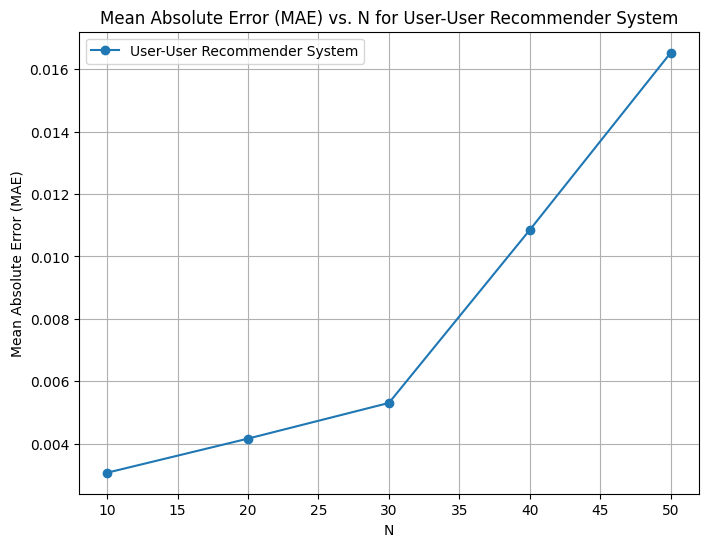

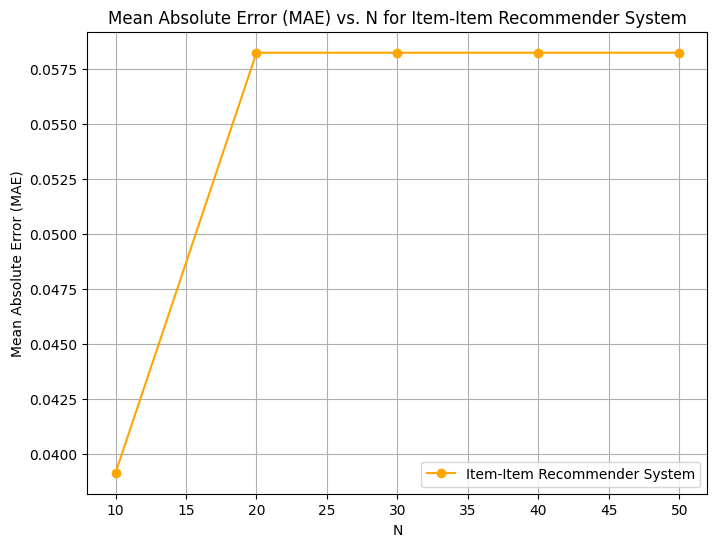

In [43]:
N_values = list(mae_results_user.keys())
mae_scores_1 = list(mae_results_user.values())
mae_scores_2 = list(mae_results_item.values())

plt.figure(figsize=(8, 6))
plt.plot(N_values, mae_scores_1, marker='o', label='User-User Recommender System')
plt.title('Mean Absolute Error (MAE) vs. N for User-User Recommender System')
plt.xlabel('N')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(N_values, mae_scores_2, marker='o', color='orange', label='Item-Item Recommender System')
plt.title('Mean Absolute Error (MAE) vs. N for Item-Item Recommender System')
plt.xlabel('N')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.legend()
plt.show()

### The TOP 10 Products by User Sum Ratings

In [44]:
product_sum_ratings = user_item.sum(axis=0)

top_products = product_sum_ratings.sort_values(ascending=False)

top_10_products = top_products.head(10)

print("Top 10 Products by User Sum Ratings:")
for rank, (product_id, sum_rating) in enumerate(top_10_products.items(), 1):
    print(f"{rank}. Product ID: {product_id}, Sum Rating: {sum_rating}")

Top 10 Products by User Sum Ratings:
1. Product ID: B00LP6CFEC, Sum Rating: 1092.0
2. Product ID: B00STP86CW, Sum Rating: 1055.0
3. Product ID: B00BN0N0LW, Sum Rating: 990.0
4. Product ID: B004WODP20, Sum Rating: 986.0
5. Product ID: B00001P4ZH, Sum Rating: 691.0
6. Product ID: B0002H02ZY, Sum Rating: 634.0
7. Product ID: B005HJWWW8, Sum Rating: 502.0
8. Product ID: B00001WRSJ, Sum Rating: 499.0
9. Product ID: B003LPTAYI, Sum Rating: 487.0
10. Product ID: B000ULAP4U, Sum Rating: 485.0
